<a href="https://colab.research.google.com/github/maxvcbhan/DADS6003-dicision-tree/blob/main/dicision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Load libraries

In [29]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [30]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import catboost

# Importing the Dataset

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")
df

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Data Analysis

In [6]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 6)

# Preparing the Data (Data Slicing)

In [7]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data

df=df.apply(string_to_int.fit_transform) #fit and transform it
df.drop("Day", axis=1, inplace=True)
df

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [8]:
#To divide our data into attribute set and Label:
feature_cols = df.columns
X = df.loc[:, df.columns != 'Play_Tennis']  #contains the attribute
y = df.Play_Tennis                                  #contains the label

In [9]:
#Experiment1
#X = X.iloc[:,0]
#X = X.to_frame()
#X.head()

In [10]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=345)

In [11]:
#if len(X_train.shape) == 1:
#  X_train = np.reshape(X_train, (-1,1))
#  X_test = np.reshape(X_test, (-1,1))

In [12]:
X_train.shape

(9, 4)

# Training and Making Predictions

In [13]:
# perform training
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [14]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [16]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
13,0,0
9,1,1
0,0,0
12,1,1
8,1,1


# Evaluating the Algorithm

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Visualizing Decision Trees

In [18]:
#!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [19]:
X_train.head(9)
y_train.head(9)
#string_to_int.inverse_transform(X_train.iloc[:,0])

,Play_Tennis
4,1
1,0
3,1
11,1
6,1
2,1
5,0
7,0
10,1


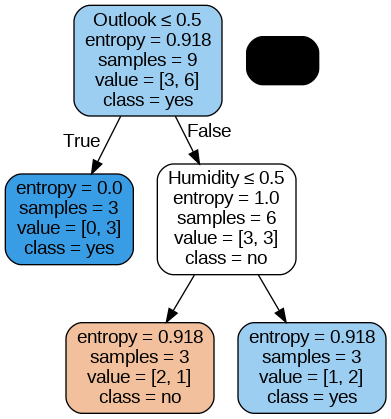

In [20]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =X.columns ,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())

1. Apply random forest, xgboost, catboot algorithm to the play tennis dataset.

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
results = {}
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results['RandomForest'] = accuracy_score(y_test, rf_pred)
results['RandomForest']

0.8

## Accuracy of random forest

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[1 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



## Hyper parameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples per leaf
    'bootstrap': [True, False]           # Whether to bootstrap samples
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with the model and parameter grid
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and use them to predict
best_rf_model = grid_search_rf.best_estimator_
rf_pred = best_rf_model.predict(X_test)

# Evaluate accuracy with the best parameters
results['RandomForest_Tuned'] = accuracy_score(y_test, rf_pred)

# Output the best parameters
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [36]:
results['RandomForest_Tuned']

0.6

## XGBOOST

In [23]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
results['XGBoost'] = accuracy_score(y_test, xgb_pred)
results['XGBoost']

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:46:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.6

## Accuracy of XGBoost

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[0 2]
 [0 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the hyperparameters to search over for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],        # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'max_depth': [3, 5, 7],                # Maximum depth of trees
    'subsample': [0.6, 0.8, 1.0],          # Subsample ratio of training instances
    'colsample_bytree': [0.6, 0.8, 1.0]    # Subsample ratio of columns when constructing each tree
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV with the model and parameter grid
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                               cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and use them to predict
best_xgb_model = grid_search_xgb.best_estimator_
xgb_pred = best_xgb_model.predict(X_test)

# Evaluate accuracy with the best parameters
results['XGBoost_Tuned'] = accuracy_score(y_test, xgb_pred)

# Output the best parameters
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:55:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [37]:
results['XGBoost_Tuned']

0.6

## CATBOOST

In [31]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(silent=True, random_state=42)
catboost_model.fit(X_train, y_train)
catboost_pred = catboost_model.predict(X_test)
results['CatBoost'] = accuracy_score(y_test, catboost_pred)
results['CatBoost']


0.8

## Accuracy of catboost

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, catboost_pred))
print(classification_report(y_test, catboost_pred))

[[1 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [35]:
from catboost import CatBoostClassifier

# Define the hyperparameters to search over for CatBoost
param_grid_catboost = {
    'iterations': [100, 200, 500],          # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'depth': [3, 5, 7],                     # Maximum depth of trees
    'l2_leaf_reg': [1, 3, 5],               # L2 regularization term on weights
    'bagging_temperature': [0.5, 1.0, 1.5]  # Bagging temperature
}

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(silent=True, random_state=42)

# Set up GridSearchCV with the model and parameter grid
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost,
                                    cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_catboost.fit(X_train, y_train)

# Get the best parameters and use them to predict
best_catboost_model = grid_search_catboost.best_estimator_
catboost_pred = best_catboost_model.predict(X_test)

# Evaluate accuracy with the best parameters
results['CatBoost_Tuned'] = accuracy_score(y_test, catboost_pred)

# Output the best parameters
print(f"Best parameters for CatBoost: {grid_search_catboost.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for CatBoost: {'bagging_temperature': 0.5, 'depth': 3, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


In [38]:
results['CatBoost_Tuned']

0.8